In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model,save_model,save
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [3]:

data = []
labels = []
classes = 43
cur_path = os.getcwd()


In [4]:

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            # sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


In [5]:

data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [6]:

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


In [7]:

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/15
981/981 [==============================] - 75s 75ms/step - loss: 2.0415 - accuracy: 0.4676 - val_loss: 0.9843 - val_accuracy: 0.7302
Epoch 2/15
981/981 [==============================] - 75s 77ms/step - loss: 0.7660 - accuracy: 0.7771 - val_loss: 0.2447 - val_accuracy: 0.9327
Epoch 3/15
981/981 [==============================] - 77s 78ms/step - loss: 0.5112 - accuracy: 0.8502 - val_loss: 0.1642 - val_accuracy: 0.9533
Epoch 4/15
981/981 [==============================] - 77s 79ms/step - loss: 0.3966 - accuracy: 0.8827 - val_loss: 0.1430 - val_accuracy: 0.9586
Epoch 5/15
981/981 [==============================] - 77s 79ms/step - loss: 0.3629 - accuracy: 0.8951 - val_loss: 0.1202 - val_accuracy: 0.9651
Epoch 6/15
981/981 [==============================] - 79s 80ms/step - loss: 0.3308 - accuracy: 0.9040 - val_loss: 0.0889 - val_accuracy: 0.9739
Epoch 7/15
981/981 [==============================] - 77s 79ms/step - loss: 0.3105 - accuracy: 0.9126 - val_loss: 0.1799 - val_accuracy:

In [9]:
from tensorflow.keras.models import load_model
model.save("modetmpl.h5",save_format='h5')

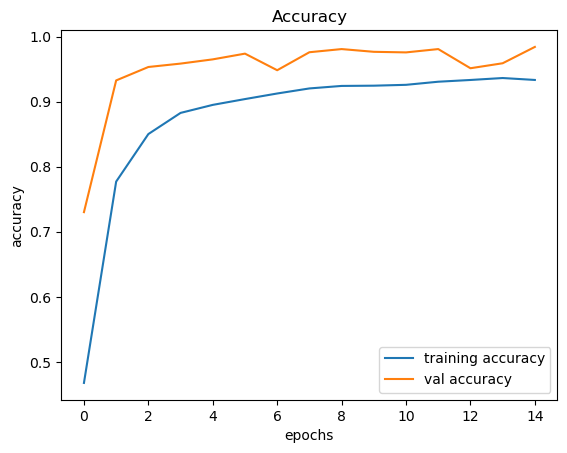

In [10]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

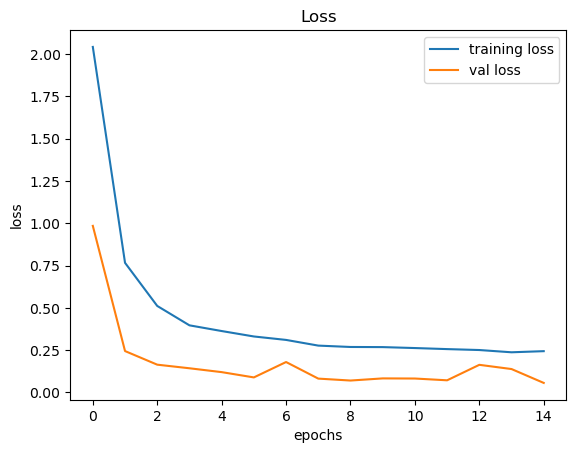

In [11]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values


In [13]:

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))

In [21]:
X_test = np.array(data)

pred = model.predict(X_test)

In [22]:
print(pred)

[[1.94710356e-24 7.50463991e-16 1.99395971e-19 ... 3.06839549e-15
  1.12222575e-16 1.47657880e-24]
 [2.14114646e-22 1.00000000e+00 2.14100612e-12 ... 1.39199726e-27
  0.00000000e+00 1.59696636e-29]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.31554475e-06 6.40142756e-03 3.45926173e-02 ... 1.13408016e-04
  3.02064964e-05 3.93395749e-04]
 [6.14350792e-11 3.46010020e-05 1.84469593e-06 ... 1.75028887e-07
  1.65278761e-14 6.32775521e-09]
 [1.25067280e-24 7.20338524e-17 2.72785830e-12 ... 2.67126812e-19
  2.27092478e-29 1.80916245e-17]]


In [24]:
print(labels)

[16  1 38 ...  6  7 10]


In [ ]:
!python gui.py

In [2]:
model=load_model("modetmpl.h5")

In [8]:
from sklearn.metrics import accuracy_score


In [10]:
X_test[0]

array([[[106,  59,  42],
        [ 94,  54,  38],
        [ 74,  50,  33],
        ...,
        [138,  82,  41],
        [131,  82,  47],
        [170, 109,  65]],

       [[105,  66,  47],
        [ 89,  58,  40],
        [ 88,  50,  29],
        ...,
        [ 97,  60,  25],
        [ 58,  48,  18],
        [ 75,  63,  27]],

       [[117,  73,  48],
        [ 96,  63,  36],
        [102,  57,  27],
        ...,
        [ 95,  63,  32],
        [ 73,  54,  22],
        [ 75,  55,  22]],

       ...,

       [[ 95,  52,  31],
        [ 90,  56,  37],
        [ 82,  48,  30],
        ...,
        [ 95,  68,  33],
        [ 96,  64,  37],
        [ 98,  70,  38]],

       [[ 96,  59,  41],
        [ 98,  57,  42],
        [104,  62,  50],
        ...,
        [102,  74,  41],
        [115,  81,  57],
        [104,  71,  44]],

       [[115,  77,  52],
        [122,  74,  49],
        [123,  80,  56],
        ...,
        [112,  83,  46],
        [ 90,  66,  35],
        [ 82,  58,  31]]

In [13]:
model.input_shape

(None, 30, 30, 3)

In [14]:
np.expand_dims(X_test[0],axis=0).shape

(1, 30, 30, 3)

In [27]:
np.argmax(y_test[0])

26

In [34]:
np.expand_dims(X_test[0], axis=0).shape

(1, 30, 30, 3)

In [37]:
test = []

In [38]:
for i in range(len(X_test)):
    test.append(np.expand_dims(X_test[i],axis=0))

In [70]:
test_labels = []
ytest = []

In [71]:
for i in test:
    test_labels.append(np.argmax(model.predict(i)))

In [72]:
for i in range(len(test_labels)):
    ytest.append(np.argmax(y_test[i]))

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(ytest,test_labels)

0.9841877072175466